## Probability mass functions
#### Make a PMF
The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.

The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the empiricaldist library.

In [49]:
import pandas as pd
gss = pd.read_hdf("gss.hdf5","gss")
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [50]:
gss.describe()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
count,62466.000000,62281.000000,62282.000000,62466.000000,62466.000000,62304.000000,55499.000000,40550.000000,36222.000000,62466.000000
mean,1994.072359,44.648320,1949.429996,1.541415,1.254955,12.831311,34702.430164,1.237534,1.695572,1.213340
std,12.937941,17.072244,20.734302,0.498286,0.554694,3.117027,30665.659411,0.425577,0.460171,0.585544
min,1972.000000,18.000000,1883.000000,1.000000,1.000000,0.000000,234.000000,1.000000,1.000000,0.411898
25%,1984.000000,30.000000,1935.000000,1.000000,1.000000,12.000000,13750.000000,1.000000,1.000000,0.918400
50%,1994.000000,43.000000,1951.000000,2.000000,1.000000,12.000000,26015.000000,1.000000,2.000000,1.062100
75%,2006.000000,57.000000,1964.000000,2.000000,1.000000,15.000000,43426.000000,1.000000,2.000000,1.515500
max,2016.000000,89.000000,1998.000000,2.000000,3.000000,20.000000,162607.000000,2.000000,2.000000,8.739876


#### Make a PMF

The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.

The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the empiricaldist library.

In [51]:
# import Pmf
from empiricaldist import Pmf

# Compute the PMF for year
pmf_year = Pmf(gss["year"])

# Print the result
print(pmf_year, "\n\n")
print(len(gss.query("year == 2016")))

0        1972
1        1972
2        1972
3        1972
4        1972
         ... 
62461    2016
62462    2016
62463    2016
62464    2016
62465    2016
Name: year, Length: 62466, dtype: int64 


2867


#### Question
How many respondents were interviewed in 2016?<br>
<br>
<strong>a.2867</strong><br>
b.1613<br>
c.2538<br>
d.0.045897<br>

Correct. The PMF makes it easy to extract insights like this. Time now to visualize the PMF for the 'age' variable of this GSS dataset!

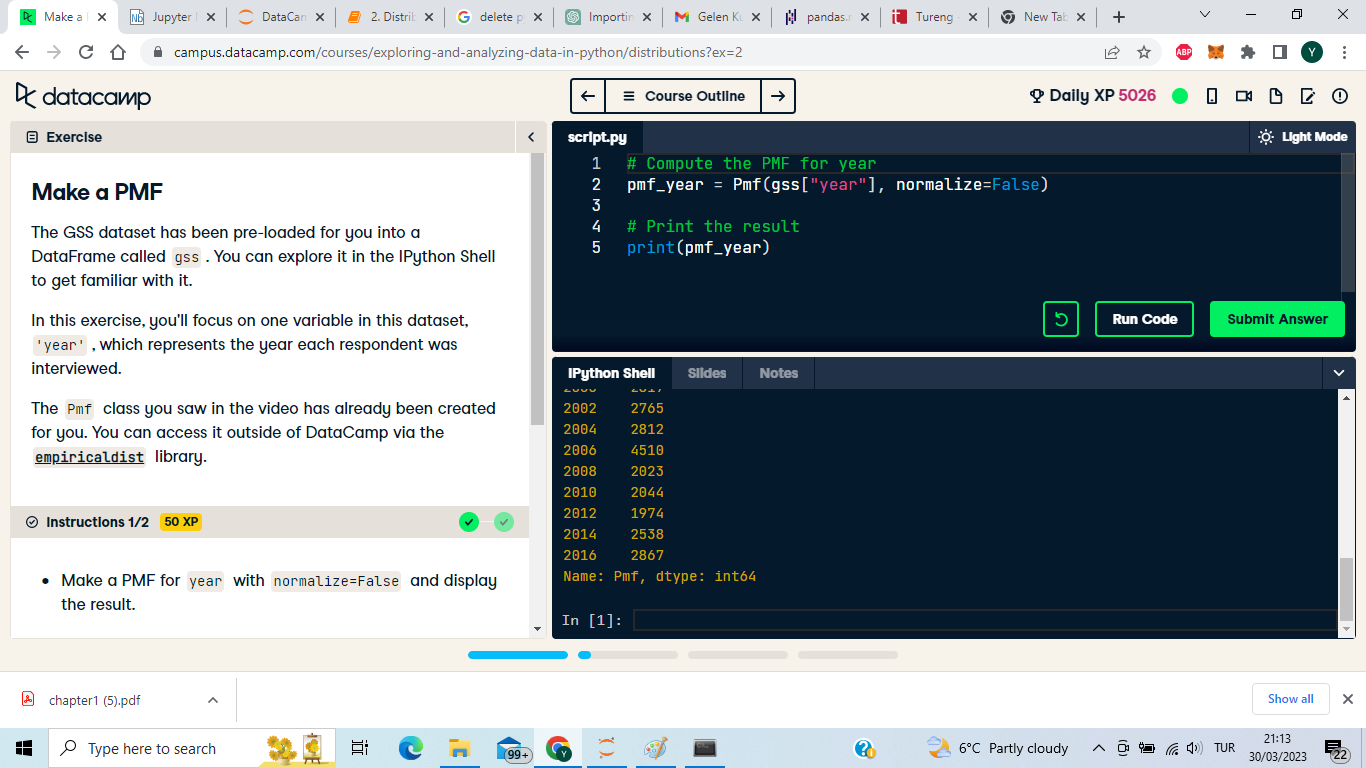

Correct. The PMF makes it easy to extract insights like this. Time now to visualize the PMF for the 'age' variable of this GSS dataset!

#### Plot a PMF
Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.

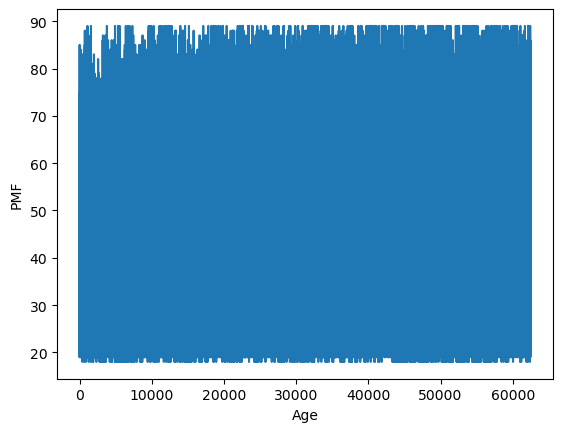

In [52]:
import matplotlib.pyplot as plt

# Select the age column
age = gss['age']

# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.plot()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

Nice job. You could also use pmf_age.plot() to plot the Pmf as a line plot.

## Cumulative distribution functions
#### Make a CDF
In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

The GSS dataset has been preloaded for you into a DataFrame called gss.

As with the Pmf class from the previous lesson, the Cdf class you just saw in the video has been created for you, and you can access it outside of DataCamp via the empiricaldist library.

In [53]:
from empiricaldist import Cdf

# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(f'The CDF value for age 30 is: {cdf_age(30)}')  # the probability that 30 or lower
print(f'The CDF value for age higher than 30 is: {1-cdf_age(30)}')  # the probability that higher than 30

The CDF value for age 30 is: 0.2539137136526389
The CDF value for age higher than 30 is: 0.7460862863473612


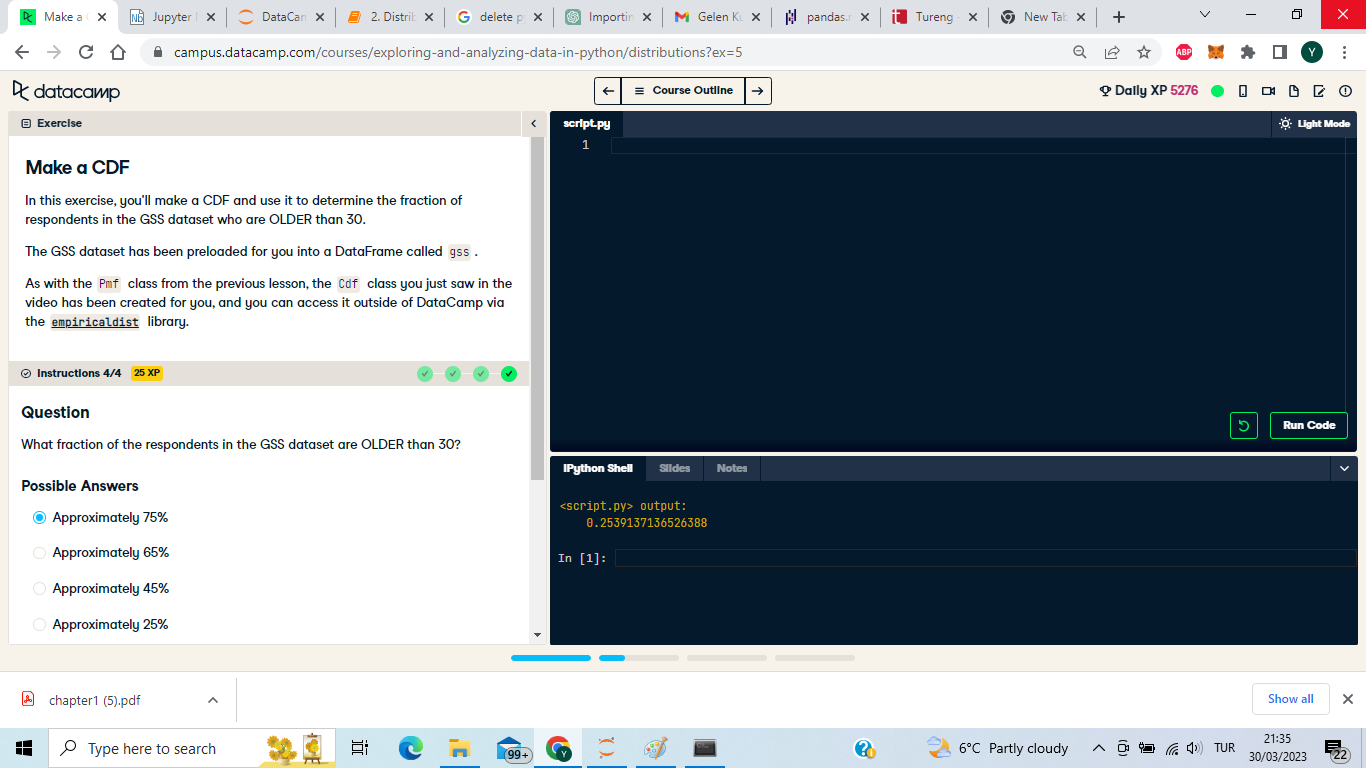

In [54]:
gss["realinc"].describe()

count     55499.000000
mean      34702.430164
std       30665.659411
min         234.000000
25%       13750.000000
50%       26015.000000
75%       43426.000000
max      162607.000000
Name: realinc, dtype: float64

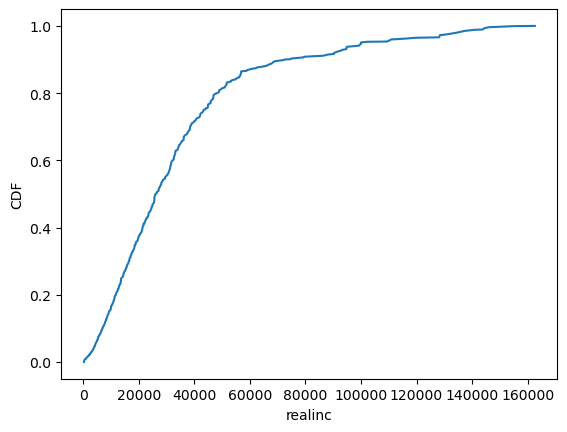

In [63]:
import matplotlib.pyplot as plt

plt.xlabel("Income")
plt.ylabel("CDF")

cdf_income = gss["realinc"]

Cdf.from_seq(cdf_income).plot()
plt.show()

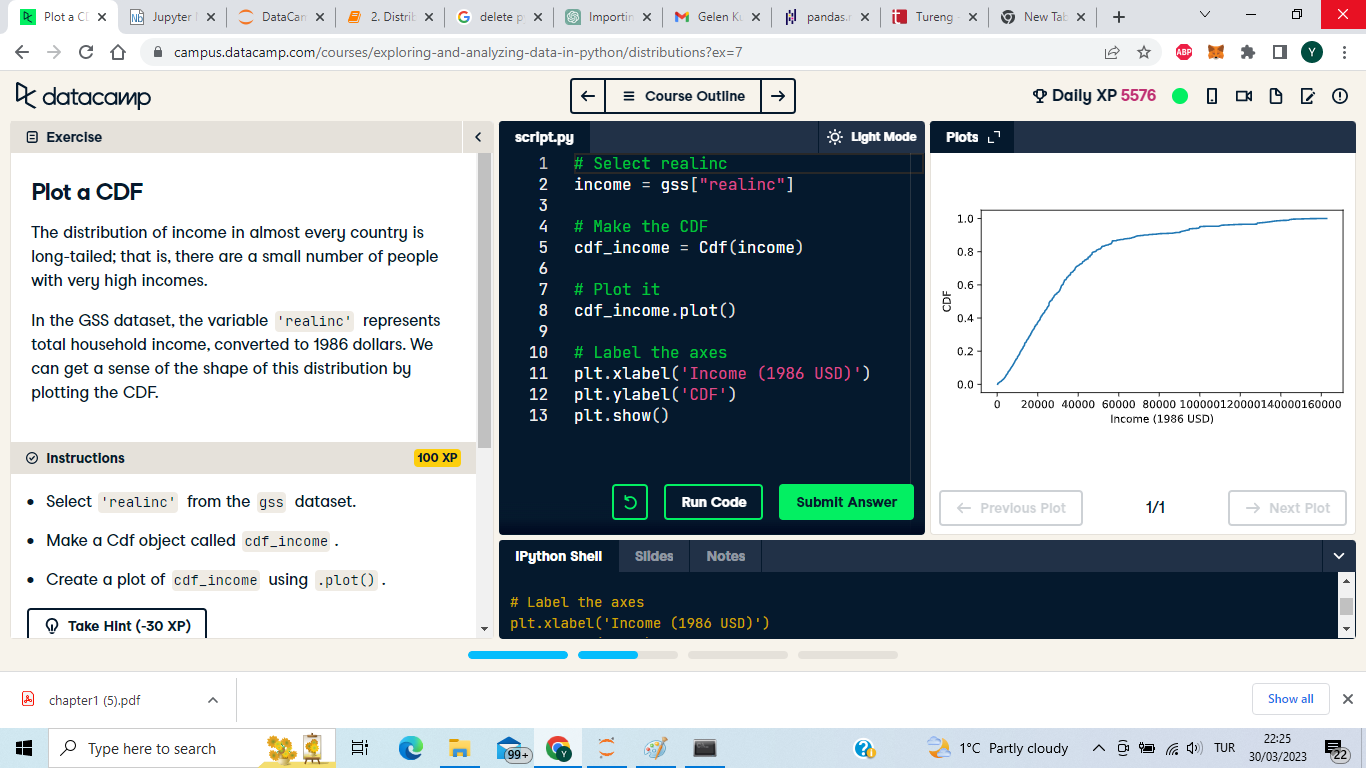

#### Compute IQR
Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the 'realinc' column, and the CDF of income has already been computed and stored in cdf_income.


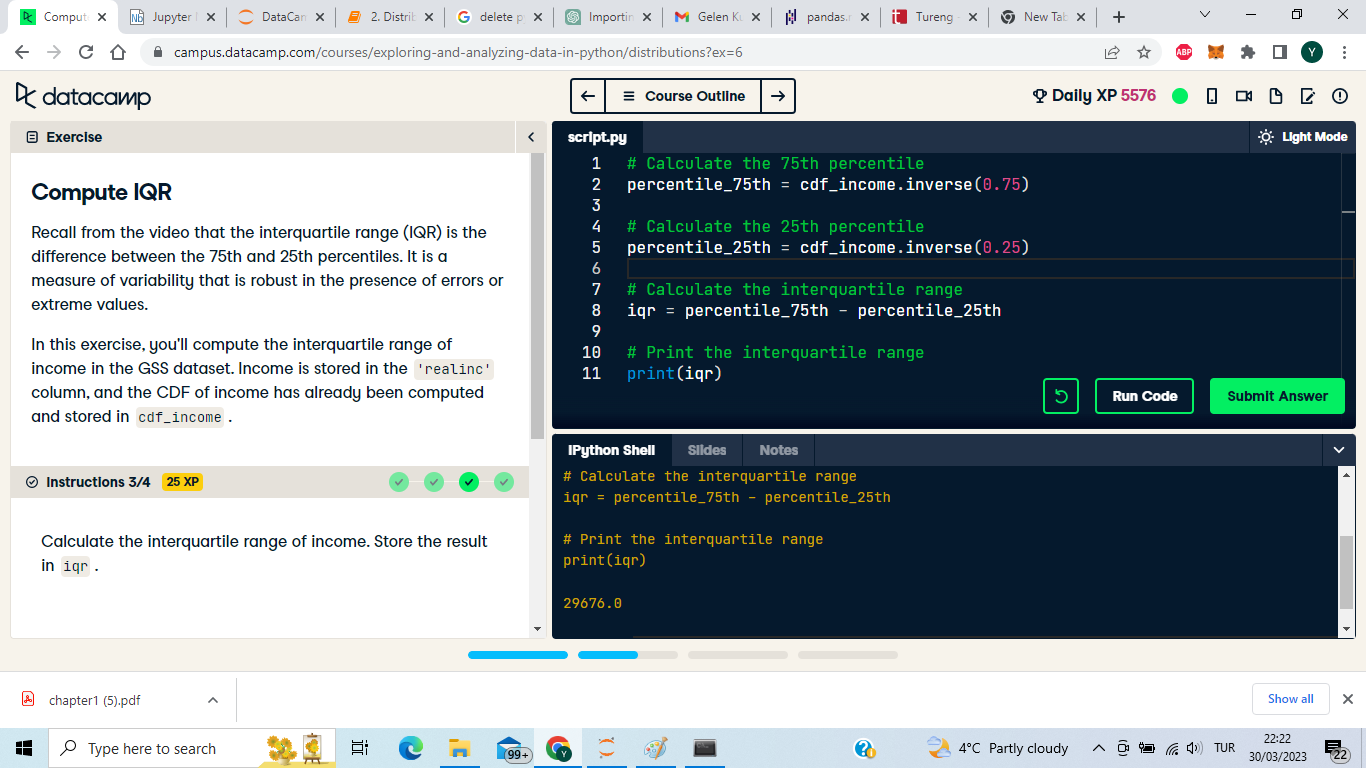

In [77]:
gss["realinc"].max()

162607.0

In [93]:
import numpy as np

q1 = gss["realinc"].quantile(0.25)
q3 = gss["realinc"].quantile(0.75)
iqr = q3 - q1

print("iqr is (builtin function):", iqr)

iqr is (builtin function): 29676.0


#### Question
What is the interquartile range (IQR) of income in the GSS dataset?

<strong>a.Approximately 29676</strong><br>
b.Approximately 26015<br>
c.Approximately 34702<br>
d.Approximately 30655<br>



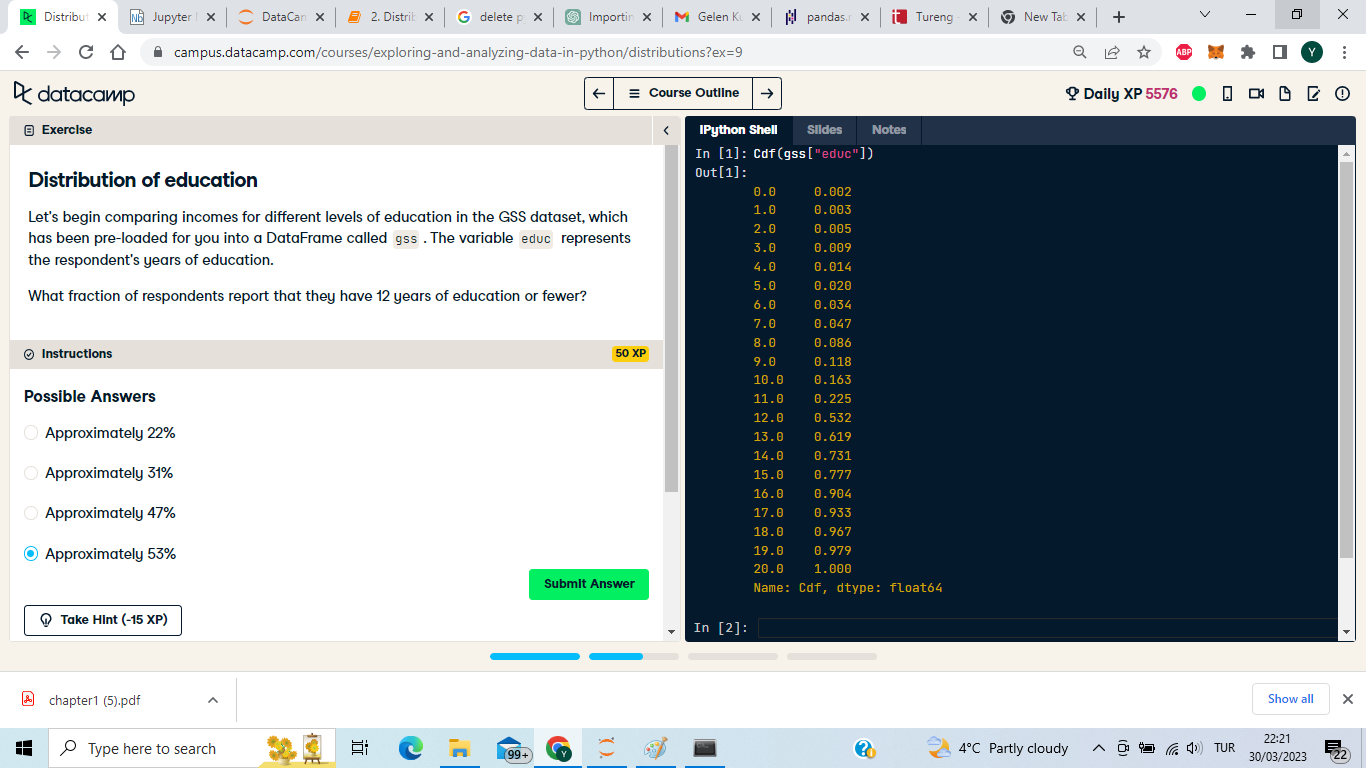

#### Extract education levels
Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

In [94]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school
high = (educ <= 12)
print(high.mean())

0.5308807991547402


Excellent. Remember, you can use logical operators to make Boolean Series and select rows from a DataFrame or Series.

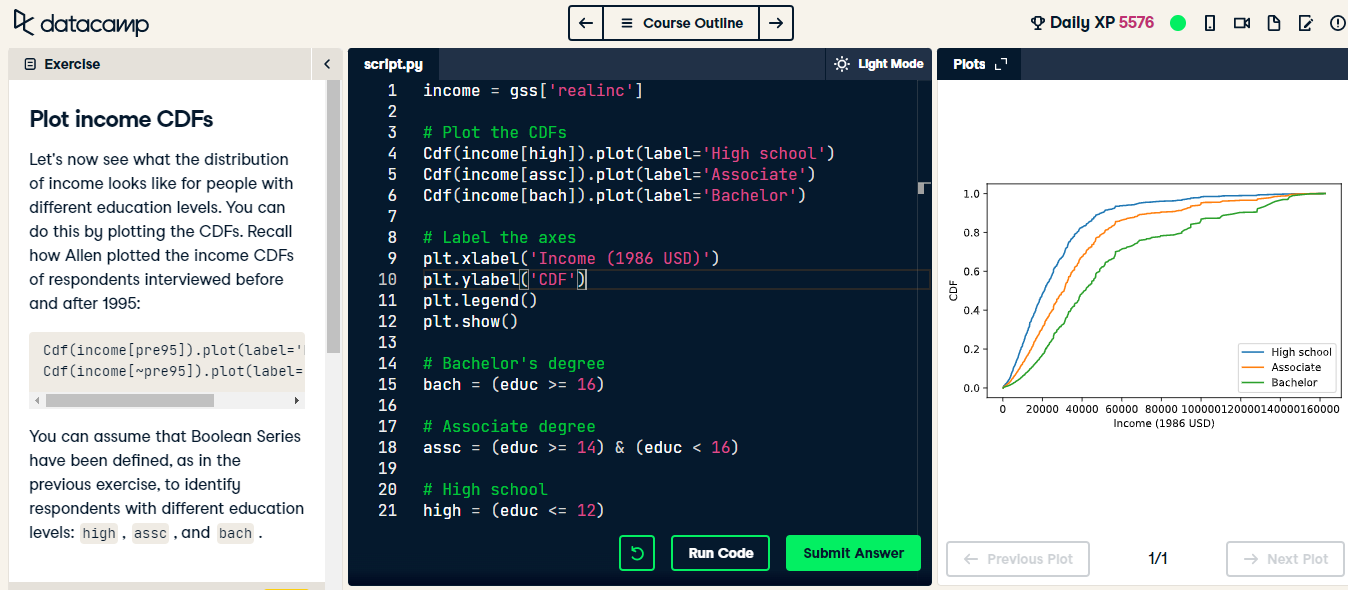

Nice job. It might not be surprising that people with more education have higher incomes, but looking at these distributions, we can see where the differences are.

## Modeling distributions
#### Distribution of income
In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

4.371148677934171 0.4290082383271419


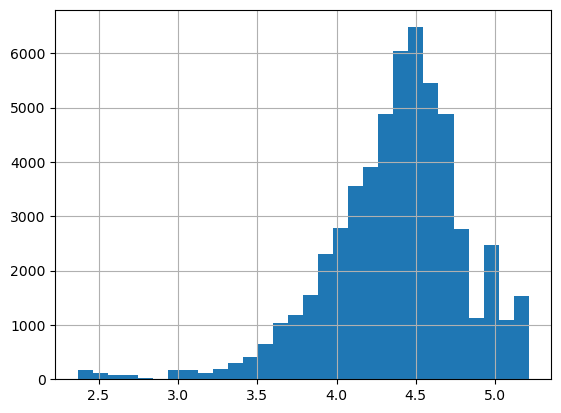

In [102]:
import numpy as np

# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

log_income.hist(bins = 30)
plt.show()

Nice work. Now we can plot the model and the observed distribution and see where they differ.

#### Comparing CDFs
To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:<br>
<br>
####### Extract realinc and compute its log<br>
log_income = np.log10(gss['realinc'])<br>
<br>
####### Compute mean and standard deviation<br>
mean, std = log_income.mean(), log_income.std()<br>
<br>
####### Make a norm object<br>
from scipy.stats import norm<br>
dist = norm(mean, std)<br>
dist is a scipy.stats.norm object with the same mean and standard deviation as the data. It provides .cdf(), which evaluates the normal cumulative distribution function.<br>
<br>
Be careful with capitalization: Cdf(), with an uppercase C, creates Cdf objects. dist.cdf(), with a lowercase c, evaluates the normal cumulative distribution function.<br>

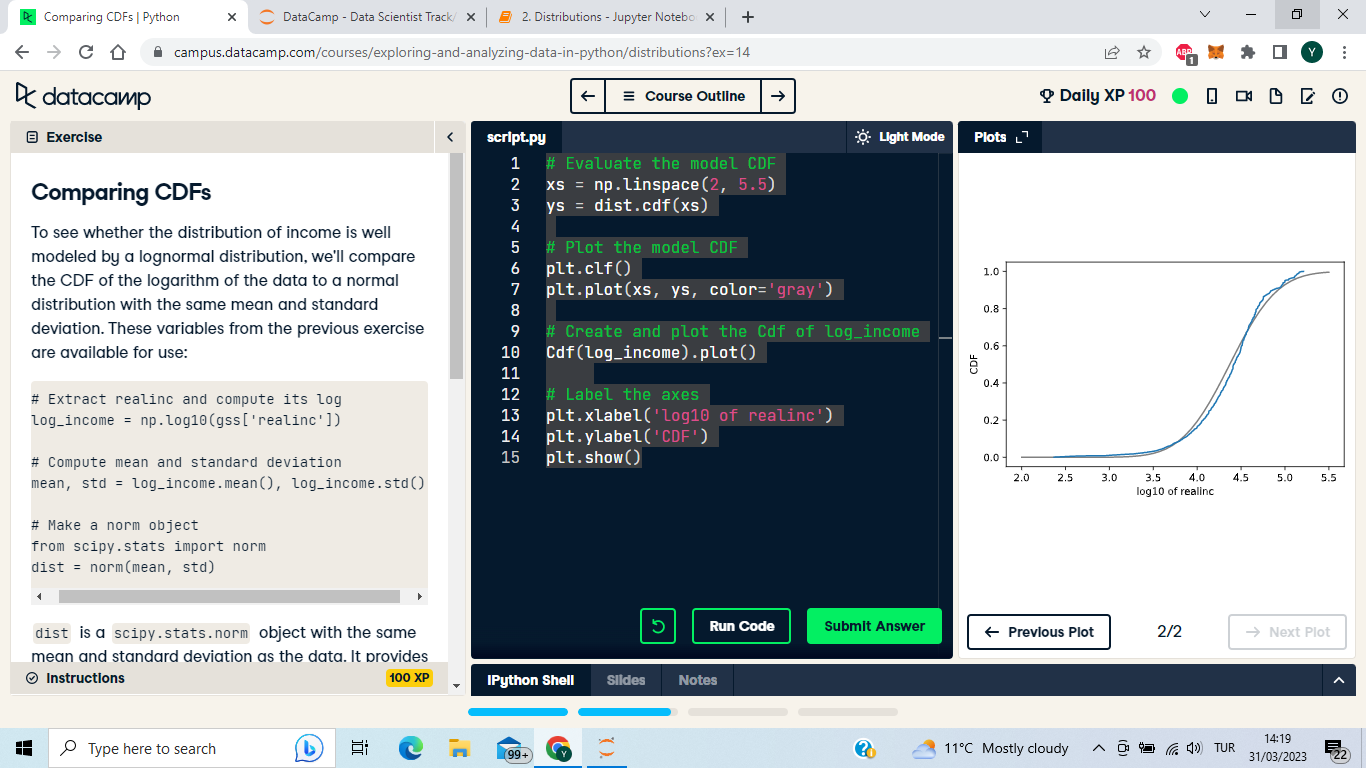

Good job. The lognormal model is a pretty good fit for the data, but clearly not a perfect match. That's what real data is like; sometimes it doesn't fit the model.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



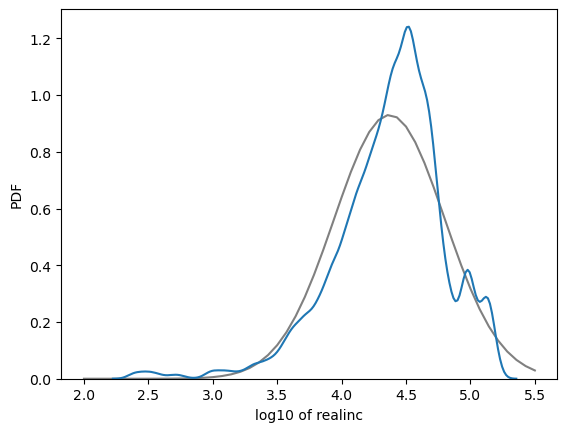

In [103]:
import seaborn as sns

# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

Congratulations on completing Chapter 2! We've seen several ways to vizualize and compare distributions: PMFs, CDFs, and KDE plots. In the next Chapter we'll explore relationships between variables, starting with heights and weights from a large survey of adults in the U.S. See you there!